Code from https://exnrt.com/blog/ai/mistral-7b-fine-tuning/

In [ ]:
! pip install transformers trl accelerate bitsandbytes peft datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.2/245.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 48.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (82

In [ ]:
import json

data = []

with open('dataset.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

In [ ]:
from datasets import Dataset

dataset = Dataset.from_list(data)

In [ ]:
!pip install --upgrade huggingface_hub

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import torch

nf4_config = BitsAndBytesConfig(
   load_in_4bit=True,
   bnb_4bit_quant_type="nf4",
   bnb_4bit_use_double_quant=True,
   bnb_4bit_compute_dtype=torch.bfloat16
)


model = AutoModelForCausalLM.from_pretrained(
    "mistralai/Mistral-7B-Instruct-v0.1",
    device_map='auto',
    quantization_config=nf4_config,
    use_cache=False

)

tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-v0.1")

tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

In [ ]:
from peft import AutoPeftModelForCausalLM, LoraConfig, get_peft_model, prepare_model_for_kbit_training

peft_config = LoraConfig(
    lora_alpha=16,
    lora_dropout=0.1,
    r=64,
    bias="none",
    task_type="CAUSAL_LM"
)

In [ ]:
model = prepare_model_for_kbit_training(model)
model = get_peft_model(model, peft_config)

In [ ]:
from transformers import TrainingArguments

args = TrainingArguments(
  output_dir = "mistral_instruct_generation",
  num_train_epochs=10,
  # max_steps = 100, # comment out this line if you want to train in epochs
  per_device_train_batch_size = 4,
  warmup_steps = 0.03,
  logging_steps=10,
  save_strategy="epoch",
  # evaluation_strategy="steps",
  eval_steps=20, # comment out this line if you want to evaluate at the end of each epoch
  learning_rate=2e-4,
  bf16=True,
  lr_scheduler_type='constant',
)

In [ ]:
from trl import SFTTrainer


trainer = SFTTrainer(
  model=model,
  peft_config=peft_config,
  max_seq_length=None,
  tokenizer=tokenizer,
  packing=True,
  args=args,
  dataset_text_field="text",
  train_dataset=dataset,
)

/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:246: UserWarning: You didn't pass a `max_seq_length` argument to the SFTTrainer, this will default to 1024
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss
10,1.518800
20,1.401200
30,1.356400
40,1.255900
50,1.168600
60,1.137200
70,1.004400
80,0.916000
90,0.868900
100,0.740200


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=T

TrainOutput(global_step=150, training_loss=0.9299782435099284, metrics={'train_runtime': 1086.757, 'train_samples_per_second': 0.543, 'train_steps_per_second': 0.138, 'total_flos': 2.587468561907712e+16, 'train_loss': 0.9299782435099284, 'epoch': 10.0})

In [ ]:
def generate_response(prompt, model):
  encoded_input = tokenizer(prompt,  return_tensors="pt", add_special_tokens=True)
  model_inputs = encoded_input.to('cuda')

  generated_ids = model.generate(**model_inputs, max_new_tokens=180, do_sample=True, pad_token_id=tokenizer.eos_token_id)

  decoded_output = tokenizer.batch_decode(generated_ids)

  return decoded_output[0]

In [ ]:
generate_response("Summarize in a pargraph about the diagnosis process of the patient having progressive headache, gait instability, and weight loss, recurrent dizziness and difficulty walking. The patient was diagnosised with uman immunodeficiency virus type 2 infection and cerebral toxoplasmosis", model)

`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:90: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


'<s> Summarize in a pargraph about the diagnosis process of the patient having progressive headache, gait instability, and weight loss, recurrent dizziness and difficulty walking. The patient was diagnosised with uman immunodeficiency virus type 2 infection and cerebral toxoplasmosis in the previous year, and was treated with pyrimethamine, sulfadazine, and leucovorin. Three months after the treatment, the headache progressed, the weight decreased by 13%, and the uman immunodeficiency virus type 2 infection serological tests became negative. The current presentation was characterized by progressive headache, gait instability, weight loss, recurrent dizziness, difficulty walking,and a positive romberg test. The patient was deemed to have a relapse of cerebral toxoplasmosis, and pyrimethamine, sulfadazine, leucovorin, and folinic acid were restarted.</s>'

In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=ca29477e3fa225f06befd17f319baf35b17ec636d5df4fe80f47fb20e4de9d1f
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
from datasets import load_metric

rouge = load_metric("rouge")

def evaluate_model_rouge(predictions, references):

     results = rouge.compute(predictions=predictions, references=references, rouge_types=['rouge1', 'rouge2'])
     formatted_results = {metric: results[metric].mid.fmeasure for metric in ["rouge1", "rouge2"]}

     return formatted_results


<ipython-input-19-55cc76808e07>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge = load_metric("rouge")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for rouge contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/rouge/rouge.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [ ]:
refrences = ['A 53-year-old woman presented with progressive headache, gait instability, and weight loss. Imaging revealed brain lesions, suggestive of T. gondii encephalitis. Serologic testing confirmed HIV-2 infection. Treatment involved antiparasitic therapy and initiation of ART. Follow-up showed improvement in symptoms and resolution of brain lesions.','A 53-year-old woman with progressive neurologic symptoms was diagnosed with HIV-2 infection and cerebral toxoplasmosis. Imaging and serologic testing supported the diagnoses. Treatment included antiparasitic therapy and initiation of ART. Follow-up showed improvement in symptoms and resolution of brain lesions.']
result = "In the previous year, and was treated with pyrimethamine, sulfadazine, and leucovorin. Three months after the treatment, the headache progressed, the weight decreased by 13%, and the uman immunodeficiency virus type 2 infection serological tests became negative. The current presentation was characterized by progressive headache, gait instability, weight loss, recurrent dizziness, difficulty walking,and a positive romberg test. The patient was deemed to have a relapse of cerebral toxoplasmosis, and pyrimethamine, sulfadazine, leucovorin, and folinic acid were restarted."

rouge_results = []

for reference in refrences:
    rouge_results.append(evaluate_model_rouge([result], [reference]))

rouge_results

[{'rouge1': 0.2698412698412699, 'rouge2': 0.08064516129032256},
 {'rouge1': 0.2786885245901639, 'rouge2': 0.033333333333333326}]

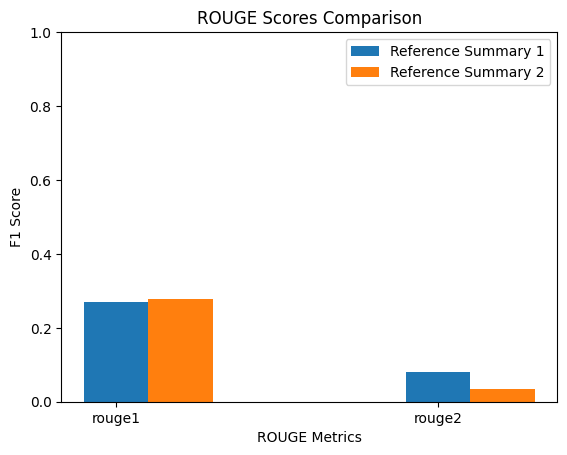

In [ ]:
import matplotlib.pyplot as plt

def plot_rouge_scores(rouge_scores):
    metrics = ["rouge1", "rouge2"]
    num_groups = len(rouge_scores)
    bar_width = 0.4 / num_groups

    for i, scores in enumerate(rouge_scores):
        plt.bar(
            [pos + bar_width * i for pos in range(len(metrics))],
            [scores[metric] for metric in metrics],
            width=bar_width,
            label=f"Reference Summary {i + 1}",
        )

    plt.xlabel("ROUGE Metrics")
    plt.ylabel("F1 Score")
    plt.title("ROUGE Scores Comparison")
    plt.xticks(range(len(metrics)), metrics)
    plt.legend()
    plt.ylim(0, 1)  # Set y-axis limits for F1 scores (0 to 1)
    plt.show()


plot_rouge_scores(rouge_results)